## Contents

- [A02.1](#A02.1)
    - [knn(k)-distribution](#knn(k)-distribution)
    - [assortativity-coefficient](#assortativity-coefficient)
- [A02.2](#A02.2)
    - [degree-distribution](#degree-distribution)
    - [clustering-coefficient](#clustering-coefficient)
        - [boxplot](#boxplot)
        - [jointplot](#jointplot)
        - [scatterplot](#scatterplot)

In [2]:
import pandas as pd
import networkx as nx
import statistics as st
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
pd.options.display.max_rows = 400

In [47]:
# read data

data_path = '/Users/luojiayu/Downloads/semester1/Network Science/Assignments/Assignment2/data-assignment2/data/'
data_random_path = '/Users/luojiayu/Downloads/semester1/Network Science/Assignments/Assignment2/data-assignment2/data_random/'


name_list = [
    'AstroPh','celegansInteractomes', 'chess','CondMat',
    'dolphins','eu_airlines','facebook','florentine_families',
    'game_thrones','internet','jazz_collab','terrorists',
]
all_graph = dict()

for name in name_list:
    graph_real = nx.read_gml(data_path+'graph_'+name+".gml")
    graph_random = nx.read_gml(data_random_path+'graph_'+name+"_random.gml")
    all_graph[name] = [graph_real, graph_random]


# A02.1

## knn(k) distribution

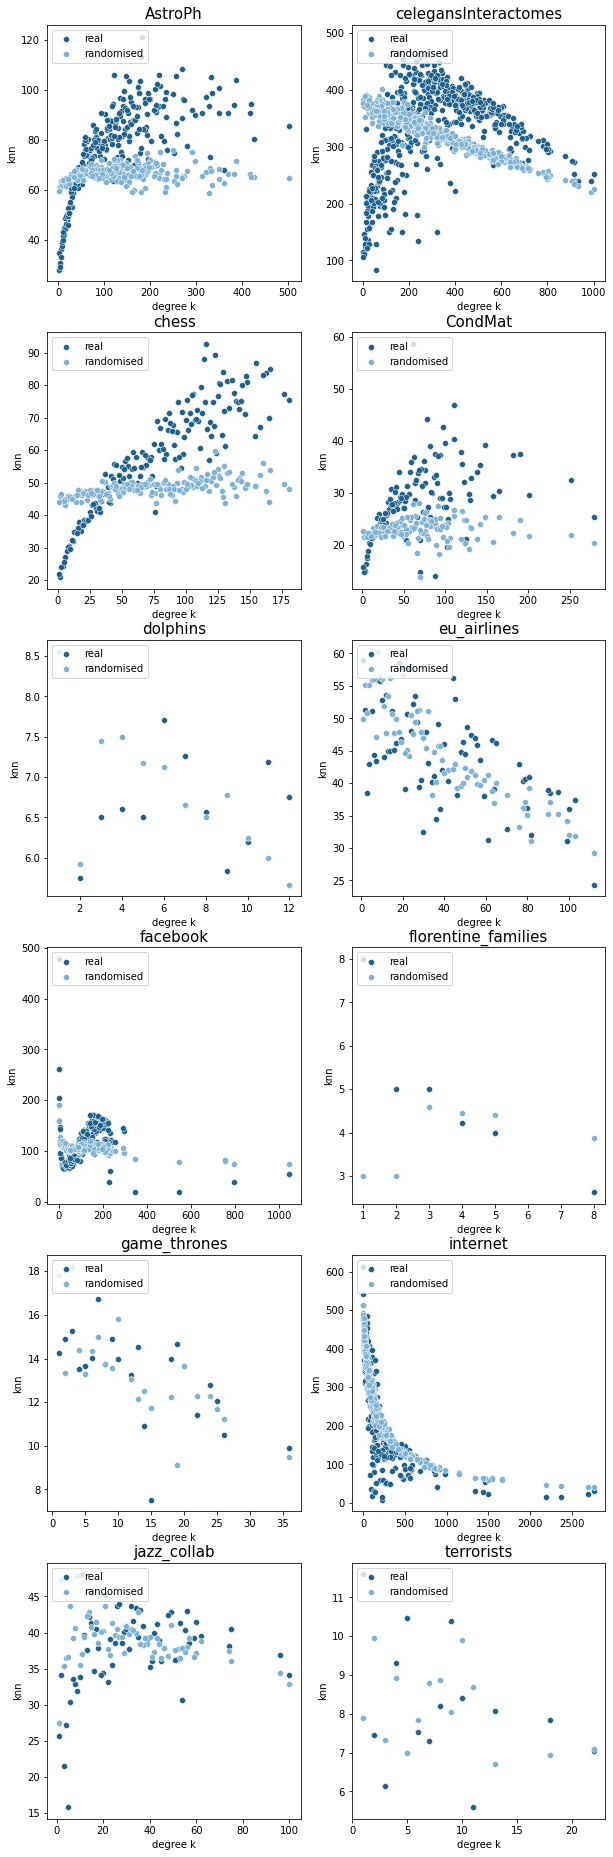

In [70]:
fig, axs = plt.subplots(nrows = len(all_graph)//2, ncols = 2, figsize=(10, 33))
graph_index = 0

for graph_name in all_graph.keys():
    
    r_index = graph_index//2
    c_index = graph_index%2
    
    graph = all_graph[graph_name][0]
    sns.scatterplot(data=nx.k_nearest_neighbors(graph), ax=axs[r_index][c_index], color = "#1F618D")
    
    graph_random = all_graph[graph_name][1]
    sns.scatterplot(data=nx.k_nearest_neighbors(graph_random), ax=axs[r_index][c_index], color = "#7FB3D5")
    
    axs[r_index][c_index].set(xlabel='degree k', ylabel='knn') 
    axs[r_index][c_index].set_title(graph_name, fontdict = {'fontsize' : 15})
    axs[r_index][c_index].legend(loc='upper left', labels=['real', 'randomised'])
    graph_index += 1
        
        

## assortativity coefficient

In [53]:
print("%-15s %-30s %-25s" % ("## Type ##", "## Dataset ##", "## assortativity coefficient ##"))

for graph_name in all_graph.keys():
        
    graph = all_graph[graph_name][0]
    graph_random = all_graph[graph_name][1]
    
    print("%-15s %-30s %-25s" %('Real',graph_name, nx.degree_assortativity_coefficient(graph)))
    print("%-15s %-30s %-25s" %('Randomised',graph_name, nx.degree_assortativity_coefficient(graph_random)))

## Type ##      ## Dataset ##                  ## assortativity coefficient ##
Real            AstroPh                        0.2013170612737268       
Randomised      AstroPh                        0.016786718783262822     
Real            celegansInteractomes           0.15169796960230708      
Randomised      celegansInteractomes           -0.16041270078807618     
Real            chess                          0.3705153782729767       
Randomised      chess                          0.04041683046547415      
Real            CondMat                        0.12528250398544846      
Randomised      CondMat                        0.01062613662239224      
Real            dolphins                       -0.04359402821531252     
Randomised      dolphins                       -0.15596767566086744     
Real            eu_airlines                    -0.15180413274193827     
Randomised      eu_airlines                    -0.22392762344094433     
Real            facebook                     

# A02.2

## degree distribution

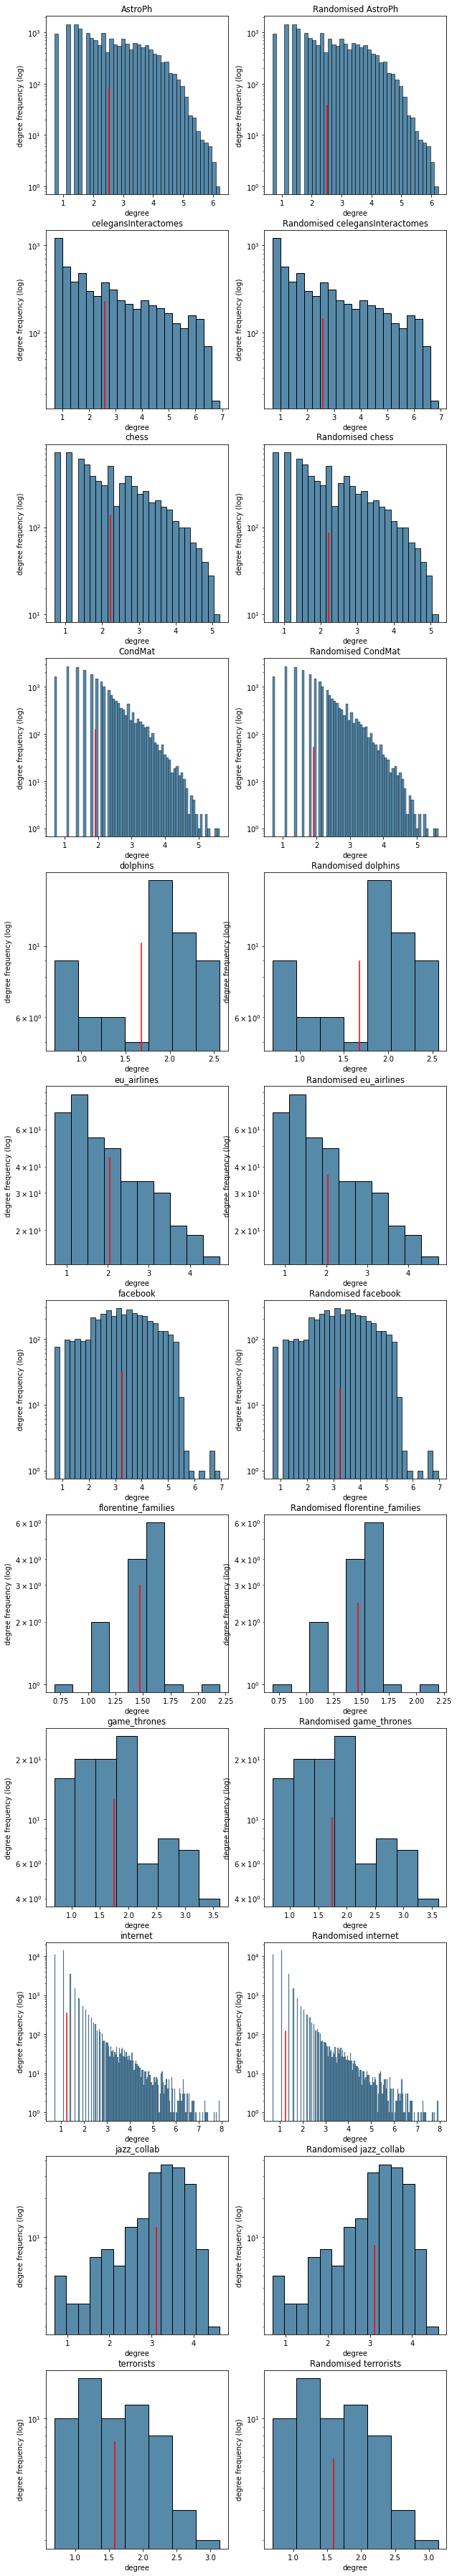

In [59]:
fig, axs = plt.subplots(nrows = len(all_graph), ncols = 2, figsize=(10, 65))
r_index = 0

for graph_name in all_graph.keys():
    
    # real graph
    graph = all_graph[graph_name][0]
    degree_arr = np.asarray([math.log1p(degree) for label, degree in graph.degree()])
    average_degree = st.mean(math.log1p(degree) for label, degree in graph.degree())
    
    sns.histplot(data=degree_arr, ax=axs[r_index][0], color = "#1F618D")
    axs[r_index][0].axvline(average_degree, 0, 0.6, color='r')
    axs[r_index][0].set_title(graph_name, fontdict = {'fontsize' : 11.5})
    axs[r_index][0].set_yscale('log')
    axs[r_index][0].set(xlabel="degree", ylabel='degree frequency'+" (log)")
    
    # Randomised graph
    graph_random = all_graph[graph_name][1]
    degree_arr = np.asarray([math.log1p(degree) for label, degree in graph_random.degree()])
    average_degree = st.mean(math.log1p(degree) for label, degree in graph_random.degree())
    
    sns.histplot(data=degree_arr, ax=axs[r_index][1], color = "#1F618D")
    axs[r_index][1].axvline(average_degree, 0, 0.5, color='r')
    axs[r_index][1].set_title("Randomised " + graph_name, fontdict = {'fontsize' : 11.5})
    axs[r_index][1].set_yscale('log')
    axs[r_index][1].set(xlabel="degree", ylabel='degree frequency'+" (log)")
    
    r_index += 1 


## clustering coefficient
- use boxplot to show the clustering coefficient distribution of real and randomised datasets
- use all data to draw scatter diagram in two methods
    - jointplot
    - scatterplot

In [71]:
# each node's clustering coefficient
for graph_name in all_graph.keys():
    
    graph = all_graph[graph_name][0]
    data_real = nx.clustering(graph)

    graph = all_graph[graph_name][1]
    data_randomised = nx.clustering(graph)
#     print('####### '+graph_name+' #######')
#     print("%-10s %-20s" %('real' , data_real))
#     print("%-10s %-20s" %('randomised' , data_randomised))

### boxplot

<AxesSubplot:xlabel='dataset_name', ylabel='clustering coefficient'>

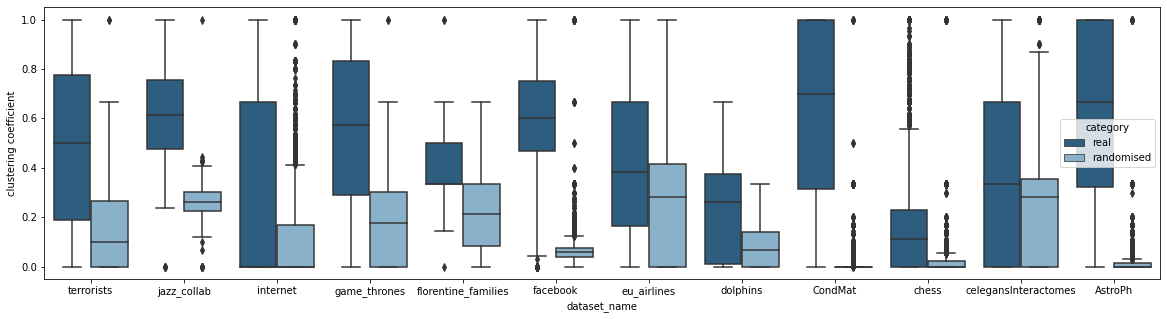

In [63]:
# Real datasets tend to have higher clustering coefficient than randomised datasets
# e.g. In dolphin dataset, <C>real = 0.25, <C>rnd = 0.08
df_all = pd.DataFrame()
for graph_name in all_graph.keys():
    
    graph = all_graph[graph_name][0]
    data_real = nx.clustering(graph)

    graph = all_graph[graph_name][1]
    data_randomised = nx.clustering(graph)

    df_randomised = pd.DataFrame(data={'clustering coefficient':data_randomised.values()})
    df_randomised['category'] = 'randomised'
    df_real = pd.DataFrame(data={'clustering coefficient':data_real.values()})
    df_real['category'] = 'real'

    df_dataset = pd.concat([df_real, df_randomised])
    df_dataset['dataset_name'] = graph_name
    
    df_all = pd.concat([df_dataset, df_all])

fig, axs = plt.subplots(figsize=(20, 5))
sns.boxplot(data=df_all, y="clustering coefficient", x="dataset_name", hue="category", palette=["#1F618D", "#7FB3D5"])


### jointplot

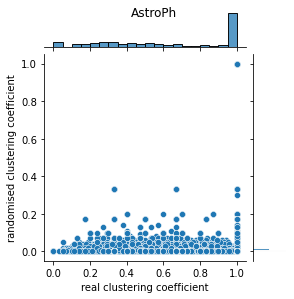

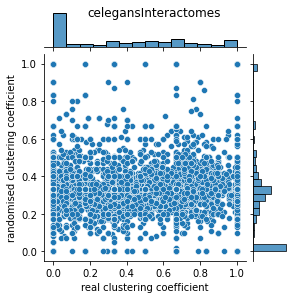

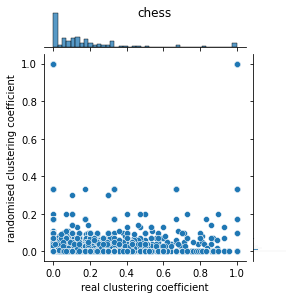

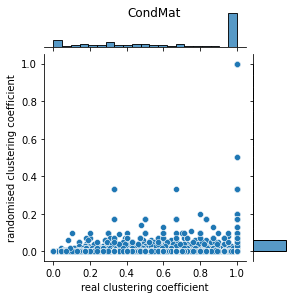

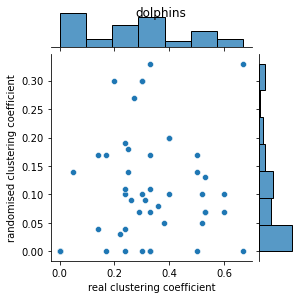

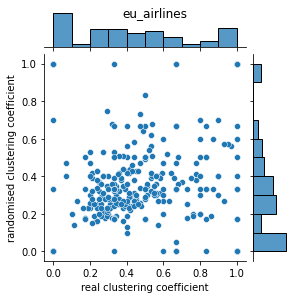

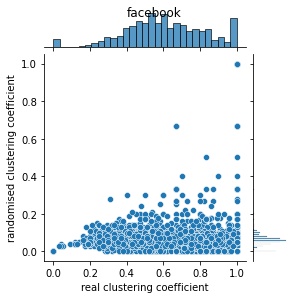

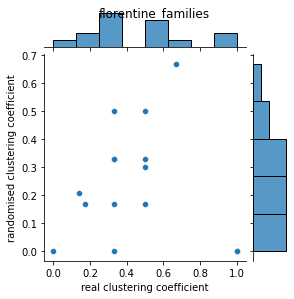

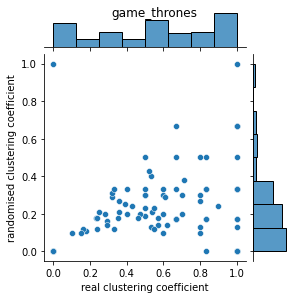

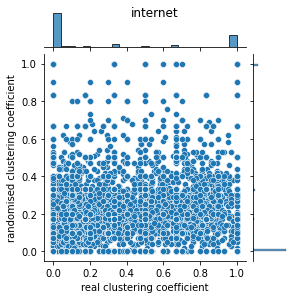

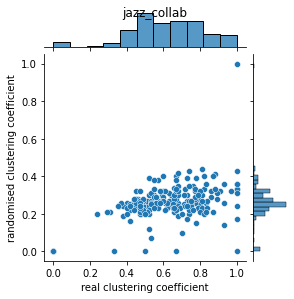

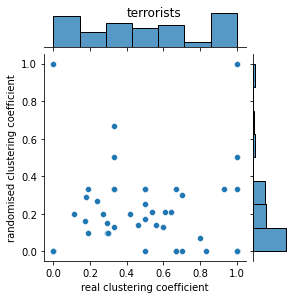

In [62]:
for graph_name in all_graph.keys():
    
    # calculate clustering
    graph = all_graph[graph_name][0]
    data_real = nx.clustering(graph)

    graph = all_graph[graph_name][1]
    data_randomised = nx.clustering(graph)
    
    real_coefficient = [round(item, 2) for item in data_real.values()]
    randomised_coefficient = [round(item, 2) for item in data_randomised.values()]
    
    plot = sns.jointplot(x=real_coefficient, y=randomised_coefficient, height=4)
    plot.set_axis_labels('real clustering coefficient', 'randomised clustering coefficient')
    plt.suptitle(graph_name)



### scatterplot

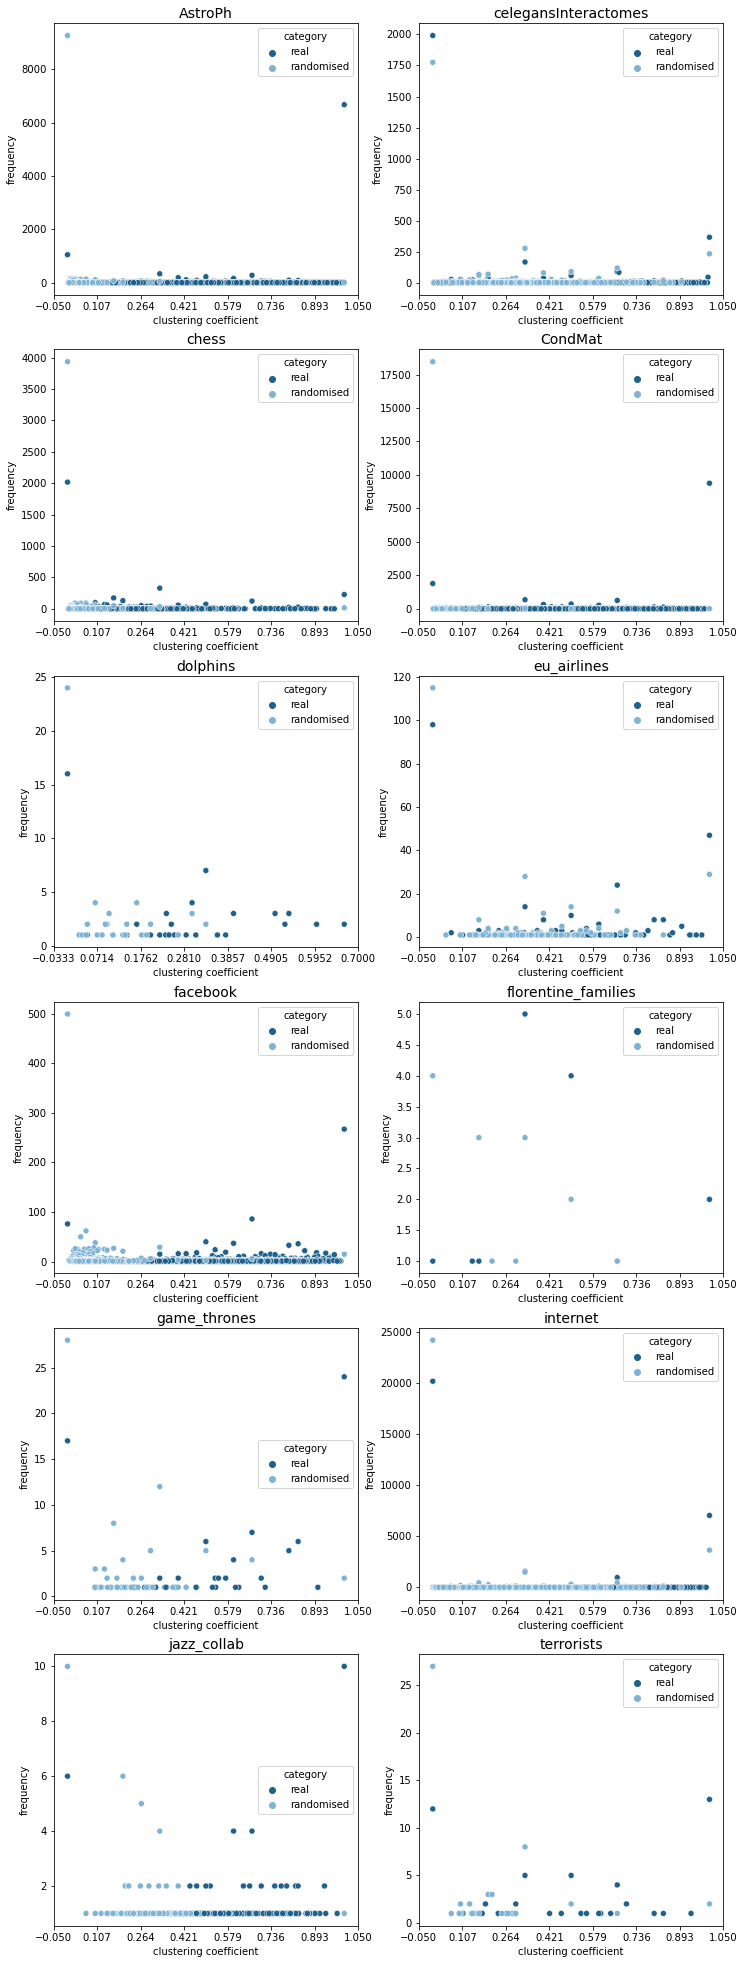

In [68]:
# outlier makes y axis very large (some nodes have the same clustering coefficient)
from collections import Counter
fig, axs = plt.subplots(nrows = len(all_graph)//2, ncols = 2, figsize=(12, 35))
graph_index = 0

for graph_name in all_graph.keys():
    
    r_index = graph_index//2
    c_index = graph_index%2
    
    graph = all_graph[graph_name][0]
    data_real = nx.clustering(graph)

    graph = all_graph[graph_name][1]
    data_randomised = nx.clustering(graph)
    
    # calculate frequency of clustering coefficient
    counter_real = Counter(data_real.values())
    counter_randomised = Counter(data_randomised.values())

    df_real = pd.DataFrame(data={'value':counter_real.keys(), 'count':counter_real.values()})
    df_real['category'] = 'real'
    df_randomised = pd.DataFrame(data={'value':counter_randomised.keys(), 'count':counter_randomised.values()})
    df_randomised['category'] = 'randomised'

    df_combine = pd.concat([df_real, df_randomised])
    
    sns.scatterplot(data=df_combine, x='value', y='count',hue='category' ,ax=axs[r_index][c_index], palette=["#1F618D", "#7FB3D5"])
    axs[r_index][c_index].set(xlabel="clustering coefficient", ylabel='frequency') 
    axs[r_index][c_index].set_title(graph_name, fontsize=14, pad=5)
    axs[r_index][c_index].xaxis.set_major_locator(ticker.LinearLocator(8))
    graph_index += 1

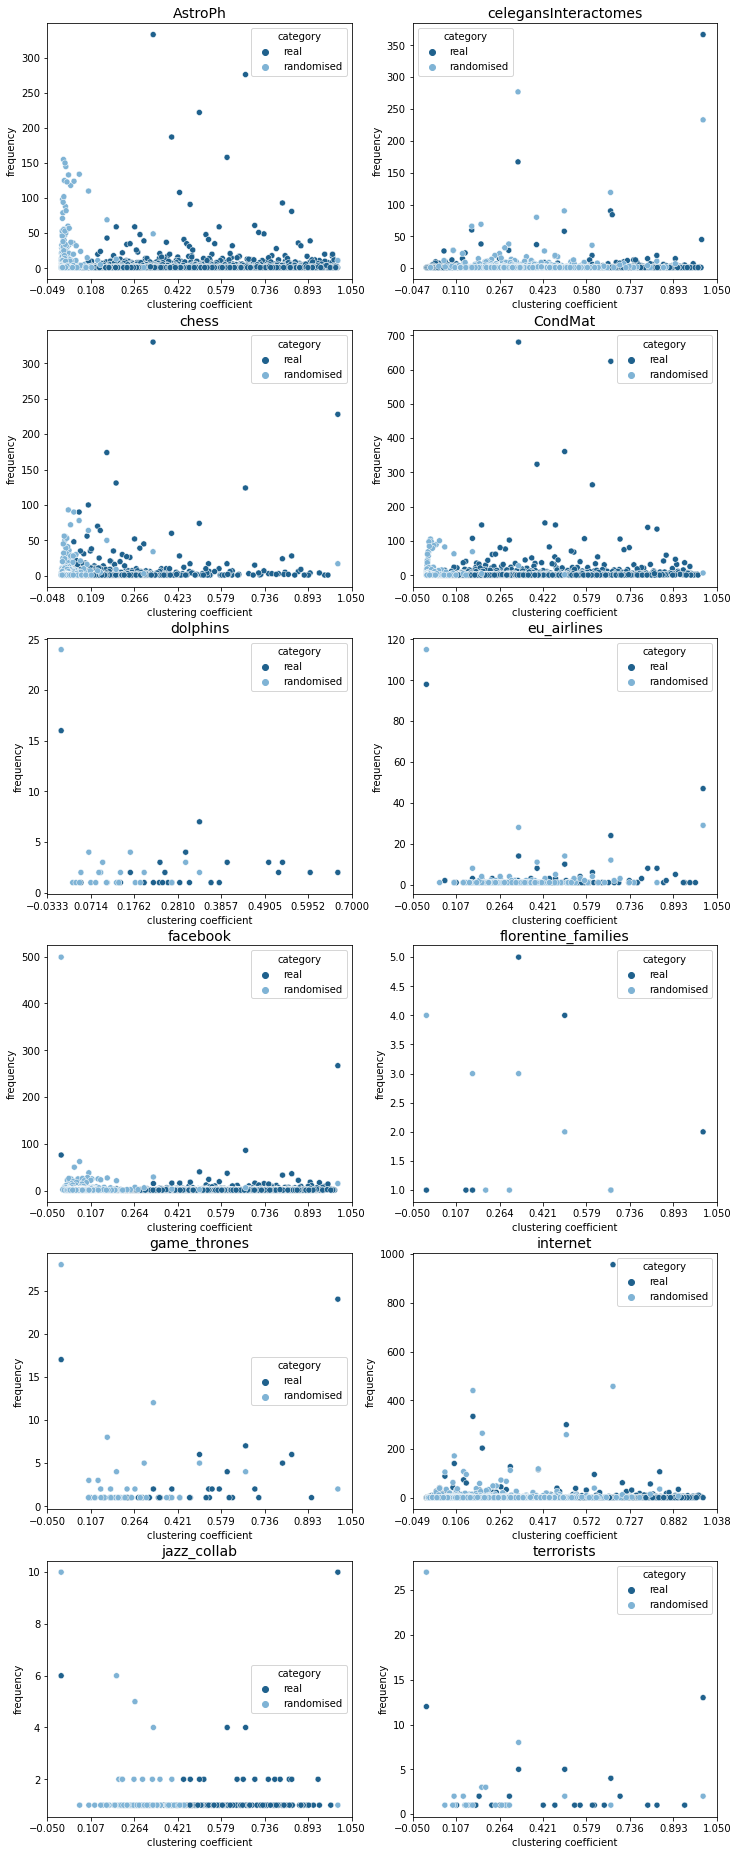

In [69]:
# filter outlier(frequency >1000) to shorten the Y-axis
# can see clearly the different distribution between the real dataset and the randomised dataset
from collections import Counter
fig, axs = plt.subplots(nrows = len(all_graph)//2, ncols = 2, figsize=(12, 35))
graph_index = 0

for graph_name in all_graph.keys():
    
    r_index = graph_index//2
    c_index = graph_index%2
    
    graph = all_graph[graph_name][0]
    data_real = nx.clustering(graph)

    graph = all_graph[graph_name][1]
    data_randomised = nx.clustering(graph)
    
    # calculate frequency of clustering coefficient
    counter_real = Counter(data_real.values())
    counter_randomised = Counter(data_randomised.values())

    df_real = pd.DataFrame(data={'value':counter_real.keys(), 'count':counter_real.values()})
    df_real['category'] = 'real'
    df_randomised = pd.DataFrame(data={'value':counter_randomised.keys(), 'count':counter_randomised.values()})
    df_randomised['category'] = 'randomised'

    df_combine = pd.concat([df_real, df_randomised])
    
    # filter outlier: outlier make y smaller
    df_combine = df_combine[df_combine['count'] <1000]
    
    sns.scatterplot(data=df_combine, x='value', y='count',hue='category' ,ax=axs[r_index][c_index], palette=["#1F618D", "#7FB3D5"])
    axs[r_index][c_index].set(xlabel="clustering coefficient", ylabel='frequency') 
    axs[r_index][c_index].set_title(graph_name, fontsize=14, pad=5)
    axs[r_index][c_index].xaxis.set_major_locator(ticker.LinearLocator(8))
    graph_index += 1